In [2]:
import forex as fx
import itertools
import numpy as np
import matplotlib.pyplot as plt



In [3]:
pair_data = np.load("pcp.npy")

In [ ]:
pairs = [
    "EUR_USD","USD_JPY","GBP_USD","AUD_USD","USD_CHF","USD_CAD","NZD_USD","EUR_GBP",
    "EUR_JPY","GBP_JPY","AUD_JPY","CHF_JPY","EUR_AUD","EUR_CHF","EUR_CAD","GBP_CHF",
    "GBP_AUD","AUD_CAD","AUD_CHF","AUD_NZD","CAD_CHF","CAD_JPY","CHF_SGD","EUR_NZD",
    "GBP_CAD","GBP_NZD","NZD_JPY","NZD_CAD","USD_SGD","USD_HKD","USD_ZAR","USD_SEK",
    "USD_NOK","USD_DKK","USD_MXN","USD_TRY","USD_RUB","USD_PLN","EUR_SEK",
    "EUR_NOK","EUR_DKK","EUR_TRY","EUR_PLN","EUR_HUF","EUR_CZK","GBP_SEK","GBP_NOK",
    "GBP_DKK","AUD_SGD","AUD_HKD","AUD_ZAR","AUD_MXN","NZD_SGD","NZD_HKD","NZD_ZAR",
    "CAD_SGD","CAD_HKD","CAD_ZAR","CHF_HKD","CHF_ZAR","SGD_JPY","SGD_CHF","SGD_HKD",
    "SGD_ZAR","HKD_JPY","HKD_CHF","HKD_ZAR","ZAR_JPY","ZAR_CHF","MXN_JPY","MXN_CHF",
    "TRY_JPY","TRY_CHF","RUB_JPY","RUB_CHF","PLN_JPY","PLN_CHF","CZK_JPY","CZK_CHF",
    "HUF_JPY","HUF_CHF","CNH_CHF","USD_INR","EUR_INR","GBP_INR","AUD_INR",
    "NZD_INR","USD_THB","EUR_THB","GBP_THB","AUD_THB","NZD_THB","USD_IDR","EUR_IDR",
    "GBP_IDR","AUD_IDR","NZD_IDR","USD_PHP","EUR_PHP","GBP_PHP","AUD_PHP","NZD_PHP",
    "USD_MYR","EUR_MYR","GBP_MYR","AUD_MYR","NZD_MYR","USD_KRW","EUR_KRW","GBP_KRW",
    "AUD_KRW","NZD_KRW","USD_SAR","EUR_SAR","GBP_SAR","AUD_SAR","USD_AED","EUR_AED",
    "GBP_AED","AUD_AED","USD_QAR","EUR_QAR","GBP_QAR","AUD_QAR","USD_ILS","EUR_ILS",
    "GBP_ILS","AUD_ILS","NZD_SAR","NZD_AED","NZD_QAR","NZD_ILS","USD_BRL","EUR_BRL",
    "GBP_BRL","AUD_BRL","NZD_BRL","USD_CZK","USD_HUF","USD_SKK","USD_NZD","EUR_RUB",
    "GBP_RUB","AUD_RUB","NZD_RUB","USD_TWD","EUR_TWD","GBP_TWD","AUD_TWD","NZD_TWD",
    "USD_PEN","EUR_PEN","GBP_PEN","AUD_PEN","NZD_PEN","USD_CLP","EUR_CLP","GBP_CLP",
    "AUD_CLP","NZD_CLP","USD_VND","EUR_VND","GBP_VND","AUD_VND","NZD_VND","USD_MXN",
    "EUR_MXN","GBP_MXN","AUD_MXN","NZD_MXN","EUR_CNH","GBP_CNH","AUD_CNH",
    "NZD_CNH","USD_KWD","EUR_KWD","GBP_KWD","AUD_KWD","NZD_KWD","USD_OMR","EUR_OMR",
    "GBP_OMR","AUD_OMR","NZD_OMR","USD_BHD","EUR_BHD","GBP_BHD","AUD_BHD","NZD_BHD"
]

# Get Max Dist 
pair_data = []
donotexistpairs = []
for i in pairs:
    try:
        pair_data.append(fx.min(i).to_numpy()[0])
    except:
        donotexistpairs.append(i)
    

c:\Users\excal\OneDrive\Documents\GitHub\FinancialGamble\Forex\oanda\forex\utilities\_utils.py:54: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(pair, interval= "1m", period = "max",progress=False, ignore_tz=True).reset_index()
c:\Users\excal\OneDrive\Documents\GitHub\FinancialGamble\Forex\oanda\forex\utilities\_utils.py:54: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(pair, interval= "1m", period = "max",progress=False, ignore_tz=True).reset_index()
c:\Users\excal\OneDrive\Documents\GitHub\FinancialGamble\Forex\oanda\forex\utilities\_utils.py:54: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(pair, interval= "1m", period = "max",progress=False, ignore_tz=True).reset_index()
c:\Users\excal\OneDrive\Documents\GitHub\FinancialGamble\Forex\oanda\forex\utilities\_utils.py:54: FutureWarning: YF.download() has changed argument auto_adj

90


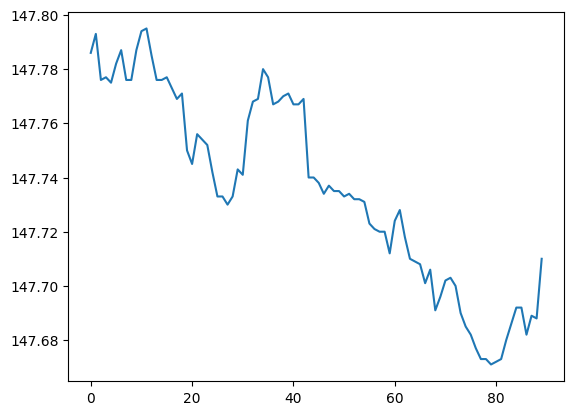

In [ ]:
pcp = pair_data.copy()

npcp = [x[:,2] for x in pair_data if x.shape[0] != 1]


sizes = []
for i in pcp:
    sizes.append(i.shape[0])
print((sizes))

nnpcp = [x[:min(sizes)] for x in npcp if x.shape[0] > x.shape[0]-1]
pcp = [x for x in nnpcp if any(num < 100 for num in x)]
# pcp = nnpcp


temp = np.array(pcp[1])
temp.shape
plt.plot(temp)
plt.show()

pcp= np.array(pcp)






np.save("pcp.npy", pcp)

# pcp.mean()

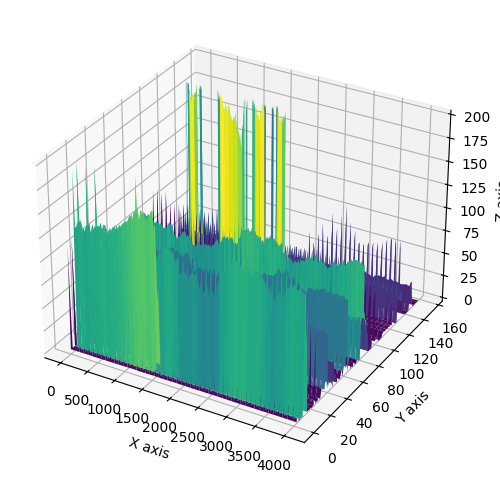

In [7]:


Z = pcp[:,:]  # shape (10,15)
Z[Z>200] = 0

# Create X and Y coordinate arrays
X = np.arange(Z.shape[1])  # columns
Y = np.arange(Z.shape[0])  # rows
X, Y = np.meshgrid(X, Y)   # create 2D grid

# Create figure and 3D axes
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')  # you can change colormap

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

